Imports 

In [126]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

Lendo a base Dados 

In [28]:
passageiros = pd.read_csv('Passageiros.csv') #Importando uma base de dados em CSV usando o pandas 
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


Definindo os Plots

In [29]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6) #Padronizando os plots
mpl.rcParams['font.size'] = 22

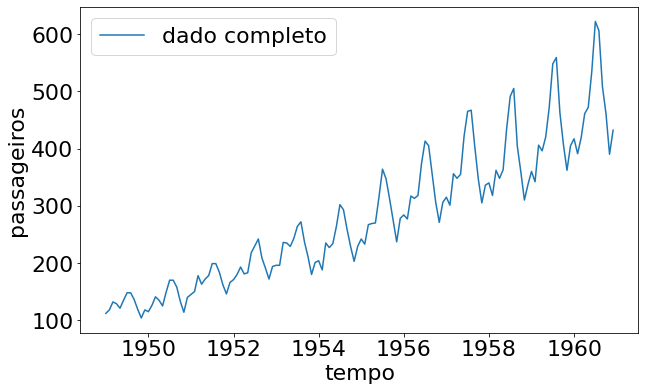

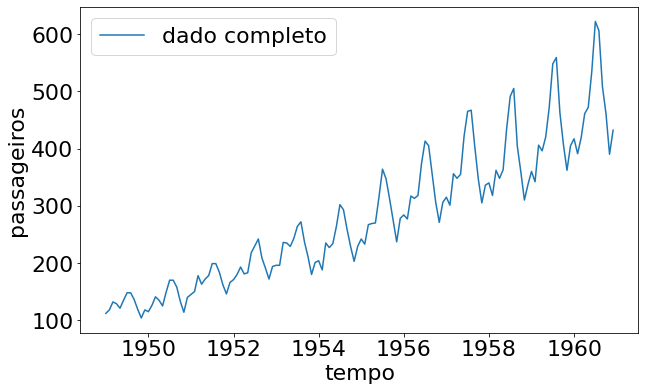

In [30]:
sns.lineplot(x= 'tempo',y= 'passageiros',data=passageiros,label='dado completo') #plot usando o Seaborn 

Escalando/Normalizando os Dados 

In [31]:
sc = StandardScaler()
sc.fit(passageiros) #Realizando o ajuste dos dados 
dados_escalados = sc.transform(passageiros) #transformando os dados e atribuindo a uma nova variável 
x= dados_escalados[:,0] # array x recebe primeira coluna 
y=dados_escalados[:,1] # array y recebe segunda coluna 

Text(0.5, 0, 'Data')

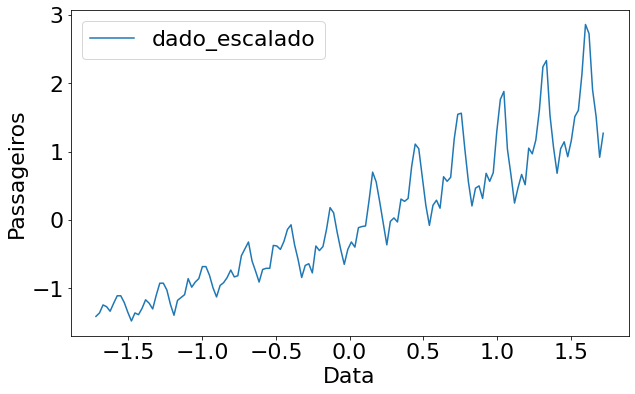

Text(0.5, 0, 'Data')

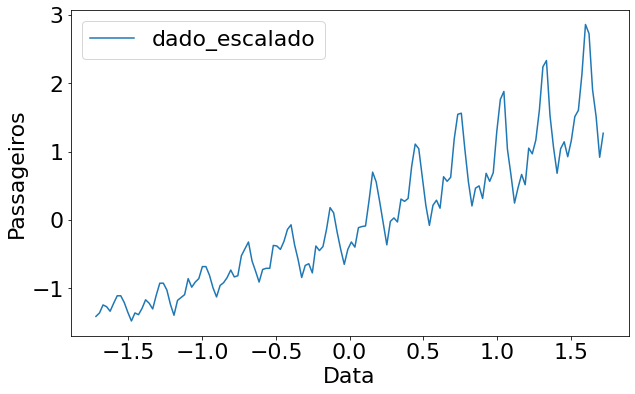

In [32]:
sns.lineplot(x=x,y=y,label="dado_escalado")
plt.ylabel('Passageiros') #Formatação usando pyplot
plt.xlabel('Data') #Formatação usando pyplot

Divisão dos dados entre treino e teste 

In [33]:
tamanho_treino = int( len(passageiros)*0.9) # Separação de 90% dos dados para o treino - definição do tamanho usando len
tamanho_teste = len(passageiros)-tamanho_treino# Separação de 10% dos dados para o teste definição do tamanho usando len 

xtreino = x[0:tamanho_treino] #atribuição dos dados treino do zero até a última posição determinada como teste 
ytreino = y[0:tamanho_treino]

xteste = x[tamanho_treino:len(passageiros)] #atribuição dos dados de teste da última posição do treino até o tamanho da base 
yteste = y[tamanho_treino:len(passageiros)]

Text(0, 0.5, 'Passageiros')

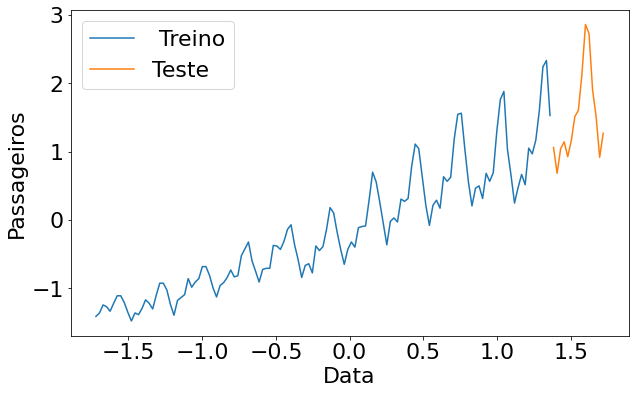

Text(0, 0.5, 'Passageiros')

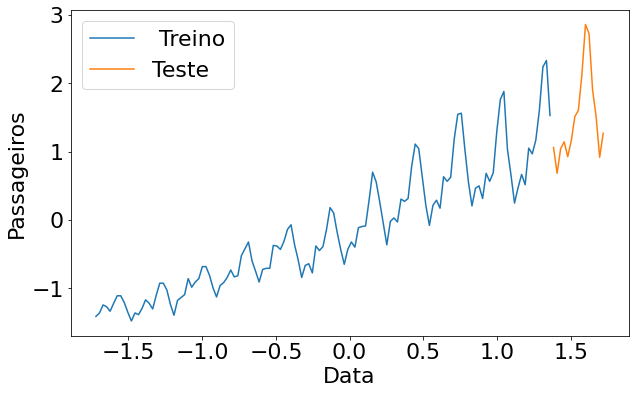

In [34]:
sns.lineplot(x=xtreino,y=ytreino,label=' Treino')
sns.lineplot(x=xteste,y=yteste,label='Teste')
plt.xlabel('Data')
plt.ylabel('Passageiros')

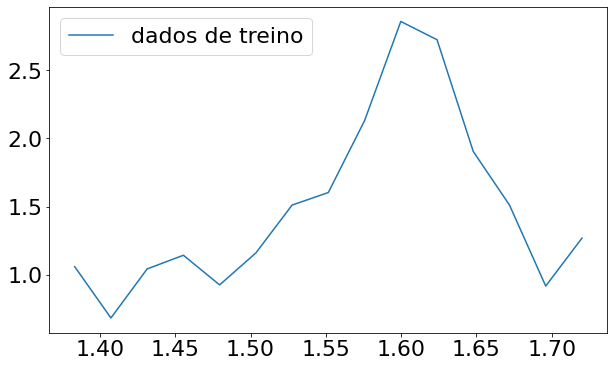

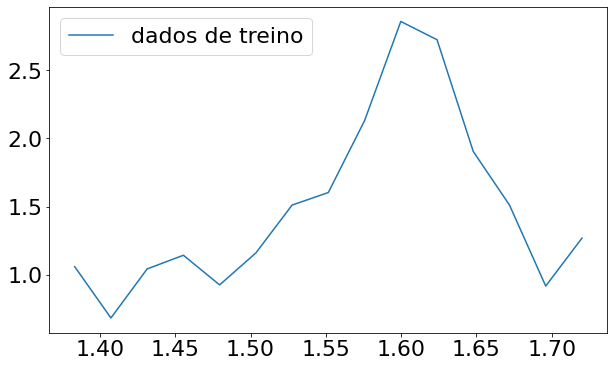

In [35]:
sns.lineplot(x=xteste,y=yteste,label='dados de treino')

In [36]:
regressor = Sequential() #inicialização do regressor 
regressor.add(Dense(1,input_dim=1,kernel_initializer='ones',activation='linear',use_bias= True))
regressor.compile(loss='mean_squared_error',optimizer= 'adam')
regressor.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fb6bd2f32d0>>

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fb6b5b68490>>

In [37]:
regressor.fit(xtreino,ytreino) # treino da rede 
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1285


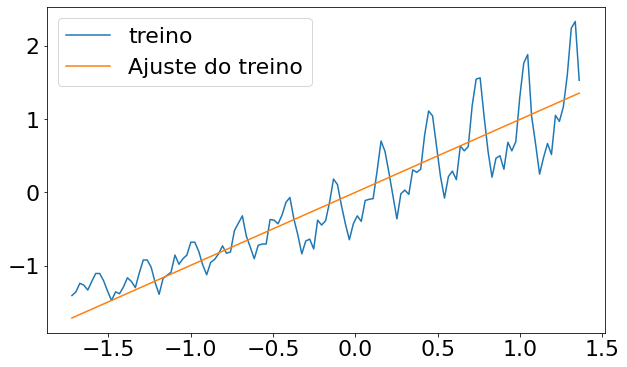

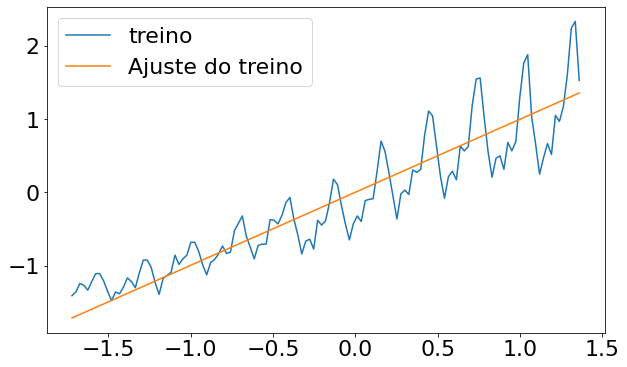

In [38]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='Ajuste do treino')

Ajuste dos dados 

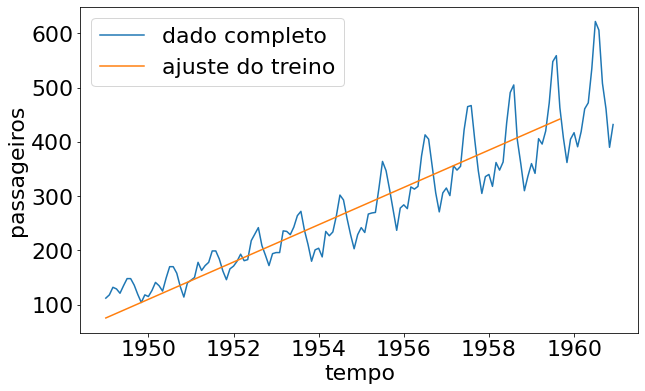

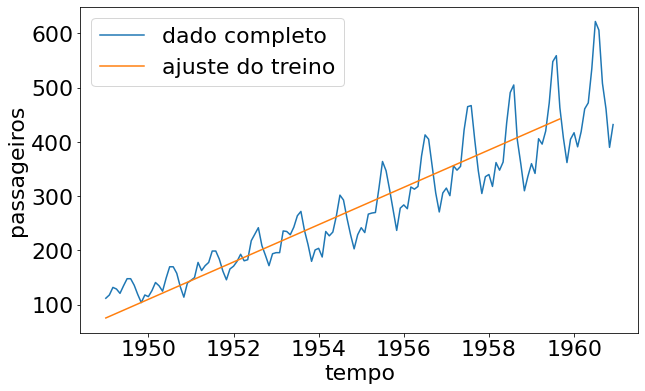

In [39]:
d= {'tempo':xtreino,'passageiro':y_predict[:,0]}
resultados = pd.DataFrame(data=d)
resultados
resultado_transf = sc.inverse_transform(resultados) #voltar a transformação para os dados originais 
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']
sns.lineplot(x='tempo',y='passageiros',data=passageiros,label='dado completo')
sns.lineplot(x='tempo',y='passageiros',data=resultado_transf,label='ajuste do treino')

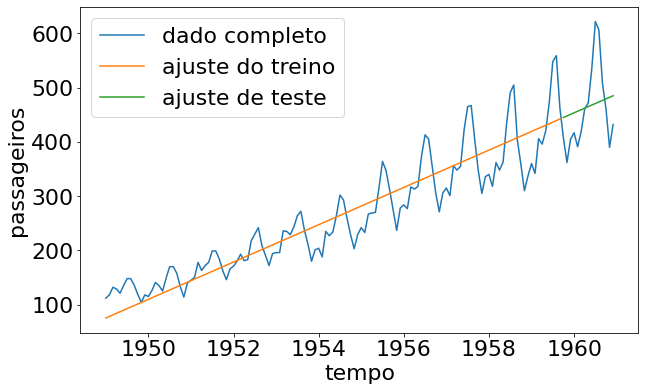

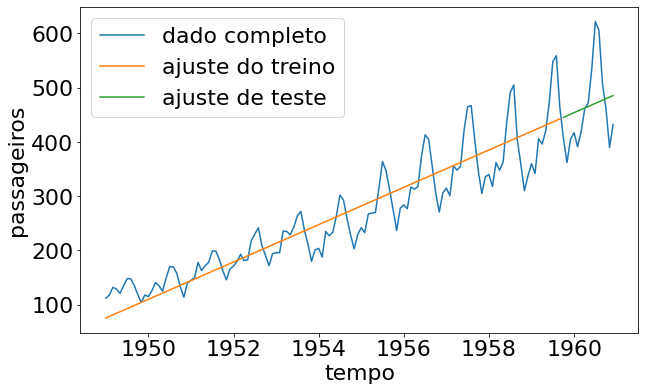

In [40]:
y_predict_teste = regressor.predict(xteste)
d = {'tempo':xteste,'passageiros':y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)
resultados_teste_transf =  sc.inverse_transform(resultados_teste) #voltar a transformação para os dados originais 
resultados_teste_transf = pd.DataFrame(resultados_teste_transf) #transforma em um dataframe 
resultados_teste_transf.columns = ['tempo','passageiros']
sns.lineplot(x='tempo',y='passageiros',data=passageiros,label='dado completo')
sns.lineplot(x='tempo',y='passageiros',data=resultado_transf,label='ajuste do treino')
sns.lineplot(x='tempo',y='passageiros',data=resultados_teste_transf,label='ajuste de teste')

In [41]:
regressor2 = Sequential()
regressor2.add(Dense(8,input_dim=1,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))
regressor2.add(Dense(8,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))
regressor2.add(Dense(1,kernel_initializer='random_uniform',activation='linear',use_bias=False))

In [42]:
regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 8         
                                                                 
 dense_9 (Dense)             (None, 

In [43]:
regressor2.fit(xtreino,ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 4ms/step - loss: 0.8044
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8008
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7976
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7967
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7962
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7946
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7930
Epoch 8/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7903
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7892
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7886
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7879
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7874
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8319
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8256
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8231
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8211
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8187
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8156
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8127
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8100
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8070
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8049
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8031
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8004
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

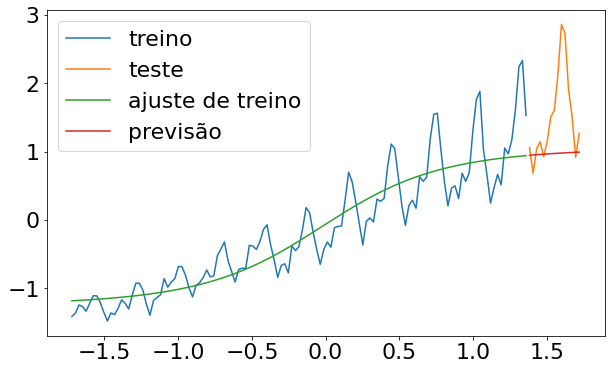

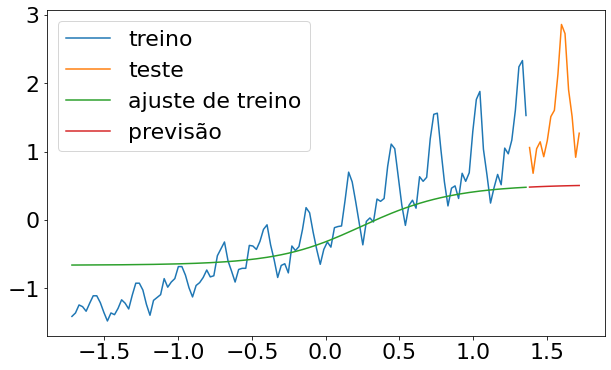

In [44]:
y_predict= regressor2.predict(xtreino)
y_predict_teste= regressor2.predict(xteste)
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste de treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

Atraso na informação de passageiros 

In [45]:
vetor = pd.DataFrame(ytreino)[0]
def separa_dados(vetor,n_passos):
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [46]:
xtreino_novo,ytreino_novo = separa_dados(vetor,1)

In [47]:
vetor2 = pd.DataFrame(yteste)[0]
xteste_novo,yteste_novo = separa_dados(vetor2,1)

Nova Rede Neural 3

In [48]:
regressor3 = Sequential()
regressor3.add(Dense(8,input_dim=1,kernel_initializer='ones',activation='linear',use_bias=False))
regressor3.add(Dense(64,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))
regressor3.add(Dense(1,kernel_initializer='random_uniform',activation='linear',use_bias=False))

In [49]:
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.fit(xtreino_novo,ytreino_novo,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7825
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7561
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7335
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7108
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6890
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6660
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6401
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6145
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5834
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5481
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5142
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4763
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7664
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7433
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7253
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7040
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6831
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6594
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6330
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6075
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5754
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5412
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5065
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4680
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

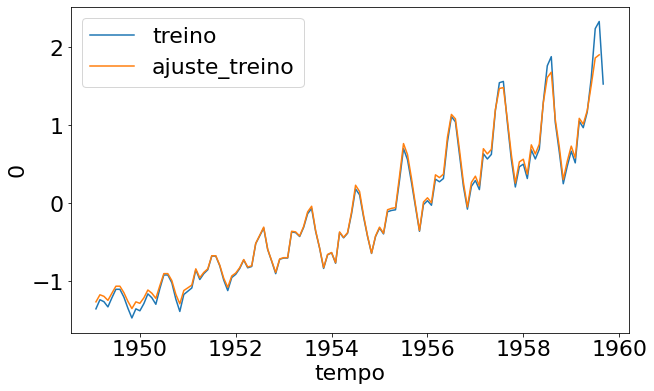

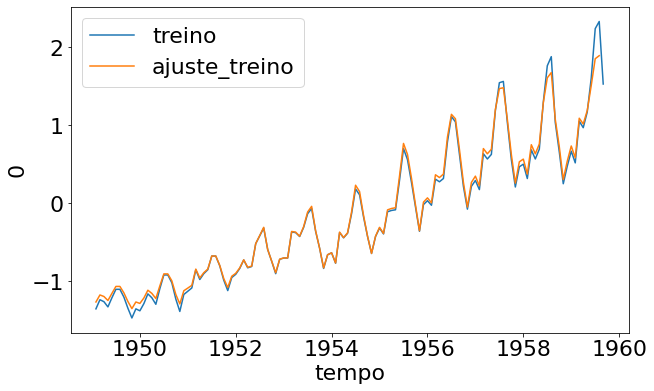

In [50]:
y_predict_novo = regressor3.predict(xtreino_novo)
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

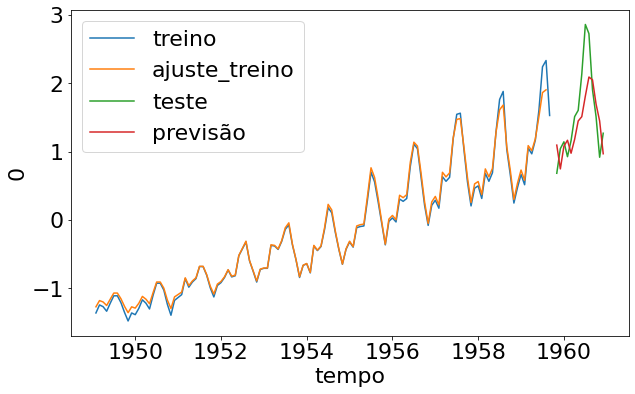

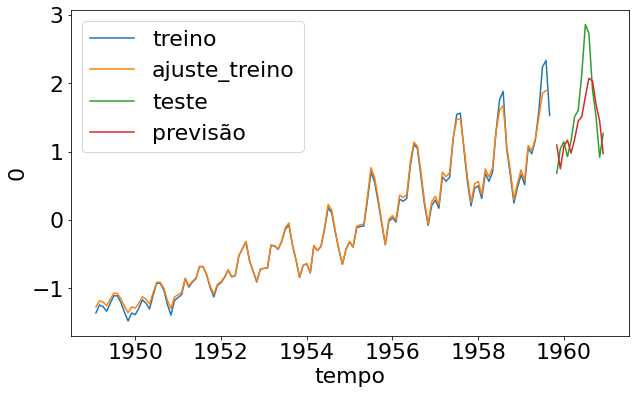

In [51]:
y_predict_teste_novo = regressor3.predict(xteste_novo)
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=(pd.DataFrame(y_predict_teste_novo)[0]).values,data=passageiros[130:144],label='previsão')

Rede Neural 4

In [60]:
xtreino_novo,ytreino_novo = separa_dados(vetor,4)
xteste_novo,yteste_novo = separa_dados(vetor2,4)

regressor4 = Sequential()
regressor4.add(Dense(8,input_dim=4,kernel_initializer='ones',activation='linear',use_bias=False))
regressor4.add(Dense(64,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))
regressor4.add(Dense(1,kernel_initializer='random_uniform',activation='linear',use_bias=False))

In [64]:
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.fit(xtreino_novo,ytreino_novo,epochs=700)

Epoch 1/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0673
Epoch 2/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0655
Epoch 3/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0648
Epoch 4/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 5/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 6/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0648
Epoch 7/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0646
Epoch 8/700
4/4 [==============================] - 0s 5ms/step - loss: 0.0651
Epoch 9/700
4/4 [==============================] - 0s 4ms/step - loss: 0.0646
Epoch 10/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0647
Epoch 11/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0647
Epoch 12/700
4/4 [==============================] - 0s 3ms/step - loss: 0.0646
Epoch 13/700
4/4 [==============================] - 0s 3ms/st

In [65]:
y_predict_novo= regressor4.predict(xtreino_novo)
y_predict_teste_novo = regressor4.predict(xteste_novo)

resultado_treino = pd.DataFrame(y_predict_novo)[0]
resultado = pd.DataFrame(y_predict_teste_novo)[0]

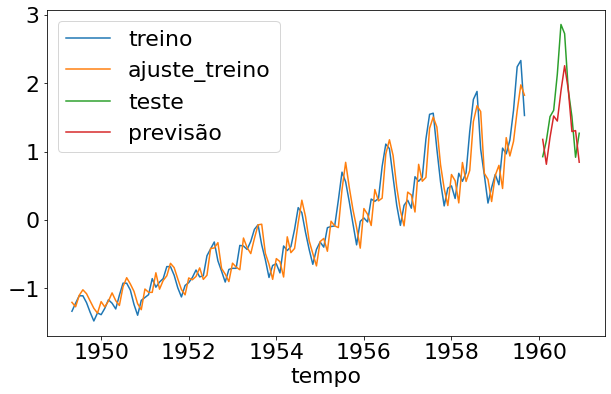

In [66]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y= resultado_treino.values,data=passageiros[4:129],label='ajuste_treino')
sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

Novo projeto e Base de Dados 

In [73]:
bike = pd.read_csv('bicicletas.csv')
bike['datas'] = pd.to_datetime(bike['datas'])


,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

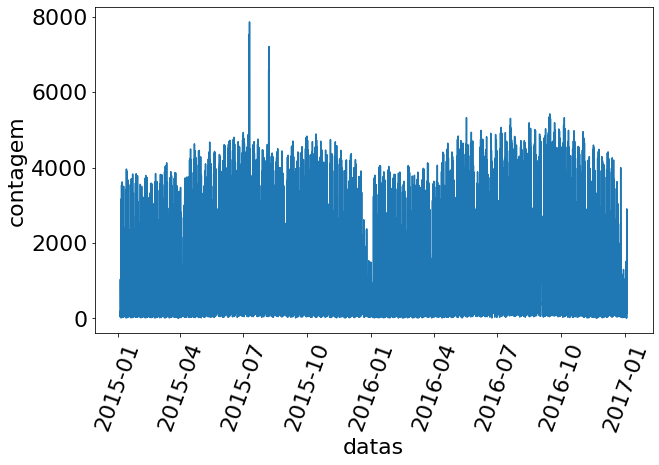

In [76]:
sns.lineplot(x='datas',y='contagem',data=bike)
plt.xticks(rotation=70)

In [81]:
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))

y = sc2.transform(bike['contagem'].values.reshape(-1,1))

tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike)-tamanho_treino

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

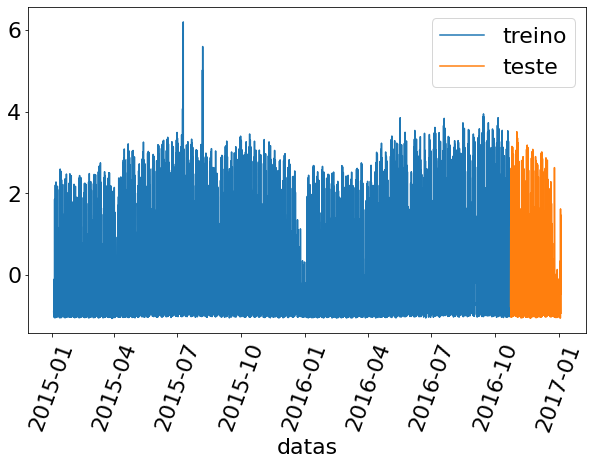

In [87]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=yteste[:,0],data=bike[tamanho_treino:len(bike)],label='teste')
plt.xticks(rotation=70)

In [98]:
vetor = pd.DataFrame(ytreino[0])
vetor2 = pd.DataFrame(yteste[0])
xtreino_novo,ytreino_novo = separa_dados(vetor,10)
xteste_novo,yteste_novo = separa_dados(vetor2,10)

In [100]:
vetor = pd.DataFrame(ytreino)[0]

In [101]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [102]:
vetor2 = pd.DataFrame(yteste)[0]

In [103]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

In [104]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [105]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [113]:
recorrente = Sequential()
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [115]:
recorrente.compile(loss='mean_squared_error',optimizer='RMSprop')
recorrente.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [117]:
recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0780 - val_loss: 0.0574
Epoch 2/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0564 - val_loss: 0.0279
Epoch 3/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0462 - val_loss: 0.0315
Epoch 4/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0431 - val_loss: 0.0286
Epoch 5/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0392 - val_loss: 0.0260
Epoch 6/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0376 - val_loss: 0.0222
Epoch 7/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0356 - val_loss: 0.0257
Epoch 8/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0344 - val_loss: 0.0241
Epoch 9/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0333 - val_loss: 0.0194
Epoch 10/100
490/490 [==============================] - 6s 11ms/step - loss: 0.032

In [118]:
y_ajustado = recorrente.predict(xtreino_novo)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

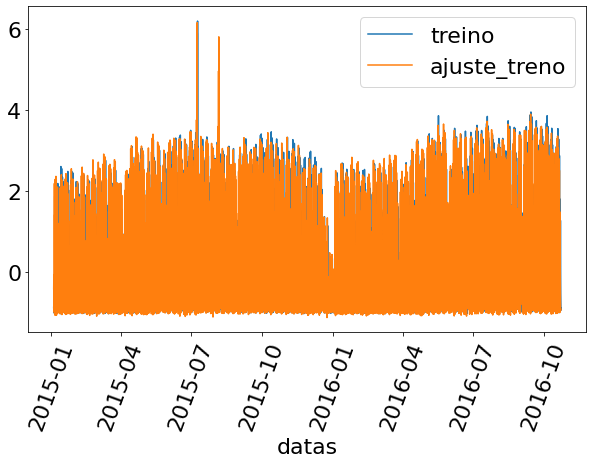

In [122]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treno')
plt.xticks(rotation=70)

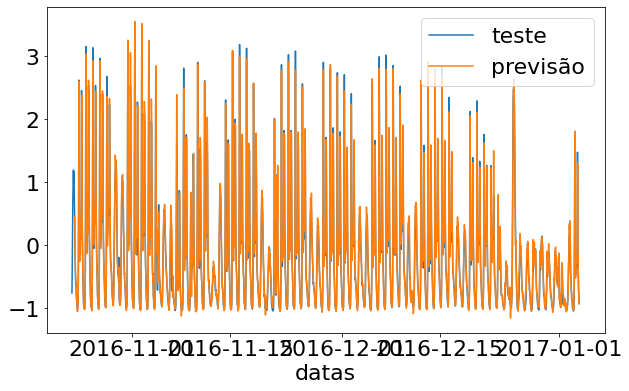

In [125]:
y_predito = recorrente.predict(xteste_novo)

sns.lineplot(x='datas',y=yteste[:,0],data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0],data=bike[tamanho_treino+10:len(bike)],label='previsão')

In [128]:
recorrente_g = Sequential()
recorrente_g.add(GRU(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

recorrente_g.compile(loss='mean_squared_error',optimizer='RMSprop')

In [129]:
recorrente.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [130]:
recorrente_g.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               50304     
                                                                 
 dense_22 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [139]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0151 - val_loss: 0.0160
Epoch 2/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0151 - val_loss: 0.0153
Epoch 3/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0149 - val_loss: 0.0216
Epoch 4/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0150 - val_loss: 0.0141
Epoch 5/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0147 - val_loss: 0.0164
Epoch 6/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0152 - val_loss: 0.0148
Epoch 7/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0145 - val_loss: 0.0172
Epoch 8/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0144 - val_loss: 0.0149
Epoch 9/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0146 - val_loss: 0.0168
Epoch 10/100
490/490 [==============================] - 5s 10ms/step - loss: 0.014

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

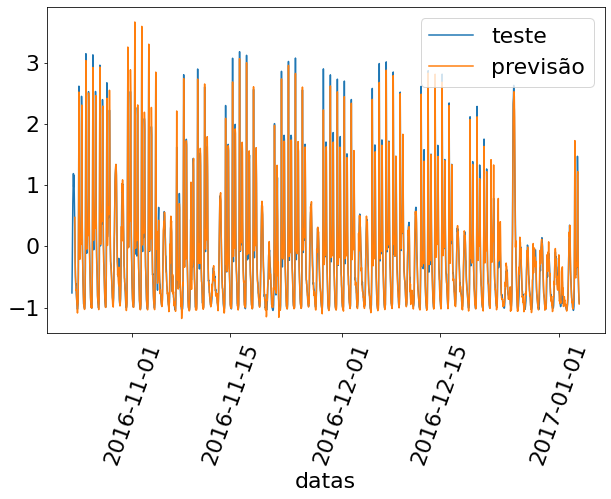

In [137]:
y_predito2 = recorrente_g.predict(xteste_novo)

sns.lineplot(x='datas',y=yteste[:,0],data = bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito2[:,0],data=bike[tamanho_treino+10:len(bike)],label='previsão')
plt.xticks(rotation=70)

In [138]:
print(resultado2.history.keys())

NameError: ignored